In [1]:
from utils import *
import sys, os
from compare_locations import compare_locations

datadir = "./data"
# preprocessed already, with 
# parallel -k python3 ../preprocessing.py ./precis_whitelist.json {1} ::: [0-7]*json

In [59]:
#similarity_collection_vs_all(collection, index = 5, method = 'Average')

In [105]:
# Generate a matrix (list of lists) for a collection (etaj)
# [point_index, index_of_closest_pt, dist_to_closest_pt, index_diff, dist_2_best_neighbor]
def test_allvsall(collection):
    lc = len(collection)
    #arr = [[0]*lc]*lc - nu merge!
    arr = [[0 for i in range(lc)] for j in range(lc)]
    for l in range(0, lc):
        for c in range(0, l):
            arr[l][c] = compare_locations(collection[l], collection[c])
            arr[c][l] = arr[l][c]
        arr[l][l] = 1 # max 

   # print("#pt minpt mindist diff dist2nbr")
    listp = []
    for l in range(0, lc):
        mindist = min(arr[l])
        index_of_min = arr[l].index(mindist)
        diff = diff_modulo(l, arr[l].index(mindist), lc)
        distl=arr[l][(l-1+lc)%lc]
        distr=arr[l][(l+1)%lc]

        #print(l, index_of_min, mindist, diff, min(distl, distr))
        listp.append([l, index_of_min, mindist, diff, min(distl, distr)])
    return listp
    

In [113]:
etaje = ["p_0-pixel-04-03-2021_15-32-38.json",
"p_1-pixel-25-02-2021_21-16-46.json",
"p_2-pixel-25-02-2021_16-27-45.json",
"p_3-pixel-04-03-2021_16-18-50.json",
"p_4-pixel-04-03-2021_16-43-50.json",
"p_5-pixel-04-03-2021_17-11-32.json",
"p_6-pixel-17-03-2021_12-52-29.json",
"p_7-pixel-17-03-2021_13-14-36.json"]

d_nearest = []
collections = []
for e in etaje: 
    json_file = os.path.join(datadir, e)
    collection = load_dataset_json(json_file)
    collections.append(collection)
    #print(e)
    d_nearest = d_nearest + test_allvsall(collection)

# points from all collections     

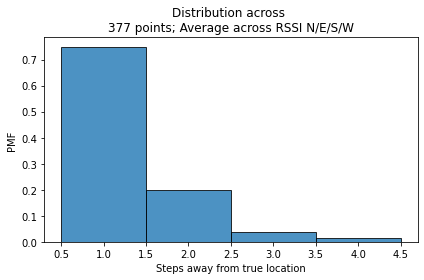

Percentages:  [0.74801061 0.19893899 0.03713528 0.01591512]


In [132]:
nearest = np.array(d_nearest)

away = nearest[:, 3] # steps away from true 
b = np.arange(1, 6, 1) # Bins of histogram - from 1 to 5 
bin_width = b[1] - b[0]

hist_away, bins_out = np.histogram(away, b, density=False)

hist_away = hist_away / away.size

fig = plt.figure()
plt.bar(b[:-1], hist_away, width=bin_width, ec='k', alpha=0.8)
plt.xlabel("Steps away from true location")
plt.ylabel("PMF")
plt.title("{}\n{}{}".format("Distribution across ", len(d_nearest), " points; Average across RSSI N/E/S/W"))

plt.tight_layout()
#fig.savefig(os.path.join(save_img_dir, fn))
plt.show()
print("Percentages: ", hist_away)

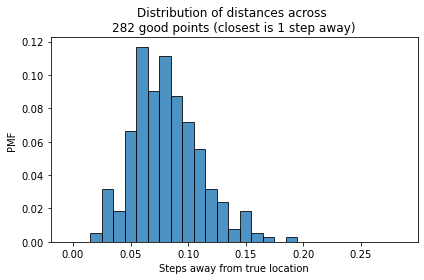

Mean Std = 0.08648237281624498 0.029241145007908052


In [139]:
good_pts = nearest[away == 1]
dists = good_pts[:, 2] # steps away from true 
b = np.arange(0, 0.3, 0.01) # Bins of histogram - from 1 to 5 
bin_width = b[1] - b[0]

hist_away, bins_out = np.histogram(dists, b, density=False)

hist_away = hist_away / away.size

fig = plt.figure()
plt.bar(b[:-1], hist_away, width=bin_width, ec='k', alpha=0.8)
plt.xlabel("Steps away from true location")
plt.ylabel("PMF")
plt.title("{}\n{}{}".format("Distribution of distances across ", len(dists), " good points (closest is 1 step away)"))

plt.tight_layout()
#fig.savefig(os.path.join(save_img_dir, fn))
plt.show()
print("Mean Std =", np.mean(dists), np.std(dists))

In [119]:
print(compare_locations(collections[1][2], collections[0][2]))


0.6301725322184567
